In [1]:
!pwd

/media/Data/Projects/sedac-vis/docs/scripts


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', **{'family': 'serif'})
# rc('text', usetex=True)

# Load the data
df = pd.read_csv("../../data/reactive-gases.csv")

df.head()

Scenario  Gas  Region      1990      2000      2010      2020      2030  \
0    A1AIM  CH4  OECD90   72.9801   73.5399   71.1634   68.9441   65.7877   
1    A1AIM  CH4     REF   47.0804   38.8544   57.8602   61.2764   59.8608   
2    A1AIM  CH4    ASIA  112.8938  125.3791  144.7888  170.7022  206.5665   
3    A1AIM  CH4     ALM   76.7245   85.1631   99.2297  119.8457  134.0362   
4    A1AIM  NOx  OECD90   12.7876   12.1483   12.3148   11.5397    8.9015   

       2040      2050      2060      2070      2080      2090      2100  
0   58.2814   51.5337   49.4557   47.4496   45.6305   43.9843   42.3882  
1   50.5076   42.3576   40.8520   39.3875   37.7340   35.9120   34.1556  
2  210.3425  214.1863  182.9251  156.1512  138.4179  127.4492  117.3276  
3  139.0303  144.2315  136.9771  130.1256  119.6887  106.7063   95.3133  
4    7.4211    6.1549    5.9222    5.6967    5.4394    5.1542    4.8811

In [3]:

# Clean the data
df = df.dropna()

# Pivot the dataframe to have scenarios as columns and years as rows
df_pivot = df.pivot_table(index='Scenario', columns='Gas')

df_pivot.head()


1990                                       2000              \
Gas             CH4         CO      NMVOC       NOx        CH4          CO   
Scenario                                                                     
A1AIM       77.4197  219.75475  34.776425  7.731825  80.734125  219.286825   
A1GMINICAM  77.4197  219.75475  34.776425  7.731825  80.734125  219.286825   
A1TMESSAGE  77.4197  219.75475  34.776425  7.731825  80.734125  219.286825   
A2ASF       77.4197  219.75475  34.776425  7.731825  80.734125  219.286825   
B1IMAGE     77.4197  219.75475  34.776425  7.731825  80.734125  219.286825   

                                      2010              ...        2080  \
Gas             NMVOC       NOx        CH4          CO  ...       NMVOC   
Scenario                                                ...               
A1AIM       35.353725  8.000375  93.260525  250.528975  ...   67.354625   
A1GMINICAM  35.353725  8.000375  89.816625  255.100150  ...  112.278975   
A1TMESSAGE  35.353725  8.000375  90.606250  250.720575  ...   49.785675   
A2ASF       35.353725  8.000375  92.552425  244.187400  ...   68.725875   
B1IMAGE     35.353725  8.000375  87.234125  197.286825  ...   24.853725   

                             2090                                     \
Gas               NOx         CH4          CO       NMVOC        NOx   
Scenario                                                               
A1AIM       10.672775   78.512950  374.748375   57.122150  10.344100   
A1GMINICAM  28.846050  178.712450  671.283450  108.732875  27.867325   
A1TMESSAGE  10.706375   79.125350  539.073650   41.763425   8.711325   
A2ASF       21.868425  207.314400  520.935200   77.170700  24.584075   
B1IMAGE      6.425375   66.484125   99.786825   24.103725   5.550375   

                  2100                                     
Gas                CH4          CO       NMVOC        NOx  
Scenario                                                   
A1AIM        72.296175  415.717950   48.373575  10.038550  
A1GMINICAM  183.739100  642.463900  104.945175  27.390525  
A1TMESSAGE   68.471150  519.154100   31.903000   7.037175  
A2ASF       222.205375  581.385625   85.615500  27.299775  
B1IMAGE      58.984125   90.786825   21.853725   4.675375  

[5 rows x 48 columns]

In [4]:
df_asia = df[df['Region']=="ASIA"]
df_asia.head()

Scenario    Gas Region      1990      2000      2010      2020  \
2        A1AIM    CH4   ASIA  112.8938  125.3791  144.7888  170.7022   
6        A1AIM    NOx   ASIA    6.9185    8.9681   12.6290   16.0853   
10       A1AIM  NMVOC   ASIA   32.7250   37.2652   49.0092   69.8832   
14       A1AIM     CO   ASIA  234.7763  269.8737  357.8412  359.6758   
18  A1GMINICAM    CH4   ASIA  112.8938  125.3791  134.6925  147.5991   

        2030      2040      2050      2060      2070      2080      2090  \
2   206.5665  210.3425  214.1863  182.9251  156.1512  138.4179  127.4492   
6    19.3457   19.0641   18.7866   17.4730   16.2509   15.1123   14.0517   
10   93.6576   99.4250  105.4852  112.1374  119.1424  111.0734   90.4576   
14  430.2657  460.0270  491.7843  505.8201  520.2457  554.8619  613.5567   
18  165.9525  186.1991  208.3391  198.4191  188.7191  179.2391  180.6791   

        2100  
2   117.3276  
6    13.0652  
10   73.0862  
14  678.3130  
18  182.1191

In [5]:
df_ch4 = df_asia[df_asia["Gas"]=="CH4"]
df_ch4.head()

Scenario  Gas Region      1990      2000      2010      2020      2030  \
2        A1AIM  CH4   ASIA  112.8938  125.3791  144.7888  170.7022  206.5665   
18  A1GMINICAM  CH4   ASIA  112.8938  125.3791  134.6925  147.5991  165.9525   
34  A1TMESSAGE  CH4   ASIA  112.8938  125.3791  151.6893  184.5367  225.4883   
50       A2ASF  CH4   ASIA  112.8938  125.3791  144.4046  162.9267  184.1843   
66     B1IMAGE  CH4   ASIA  112.8938  125.3791  136.3791  148.3791  154.3791   

        2040      2050      2060      2070      2080      2090      2100  
2   210.3425  214.1863  182.9251  156.1512  138.4179  127.4492  117.3276  
18  186.1991  208.3391  198.4191  188.7191  179.2391  180.6791  182.1191  
34  226.3941  227.2699  200.1164  167.0229  147.0400  130.4478  109.7856  
50  205.3671  226.5499  240.9931  255.4363  271.6277  289.5672  307.5067  
66  161.3791  157.3791  149.3791  141.3791  128.3791  118.3791  105.3791

In [6]:
df_ch4_raw = df_ch4.drop(columns=["Scenario", "Gas", "Region"])
df_ch4_raw.head()

1990      2000      2010      2020      2030      2040      2050  \
2   112.8938  125.3791  144.7888  170.7022  206.5665  210.3425  214.1863   
18  112.8938  125.3791  134.6925  147.5991  165.9525  186.1991  208.3391   
34  112.8938  125.3791  151.6893  184.5367  225.4883  226.3941  227.2699   
50  112.8938  125.3791  144.4046  162.9267  184.1843  205.3671  226.5499   
66  112.8938  125.3791  136.3791  148.3791  154.3791  161.3791  157.3791   

        2060      2070      2080      2090      2100  
2   182.9251  156.1512  138.4179  127.4492  117.3276  
18  198.4191  188.7191  179.2391  180.6791  182.1191  
34  200.1164  167.0229  147.0400  130.4478  109.7856  
50  240.9931  255.4363  271.6277  289.5672  307.5067  
66  149.3791  141.3791  128.3791  118.3791  105.3791

In [7]:
import numpy as np
np.array(df_ch4_raw)

array([[112.8938, 125.3791, 144.7888, 170.7022, 206.5665, 210.3425,
        214.1863, 182.9251, 156.1512, 138.4179, 127.4492, 117.3276],
       [112.8938, 125.3791, 134.6925, 147.5991, 165.9525, 186.1991,
        208.3391, 198.4191, 188.7191, 179.2391, 180.6791, 182.1191],
       [112.8938, 125.3791, 151.6893, 184.5367, 225.4883, 226.3941,
        227.2699, 200.1164, 167.0229, 147.04  , 130.4478, 109.7856],
       [112.8938, 125.3791, 144.4046, 162.9267, 184.1843, 205.3671,
        226.5499, 240.9931, 255.4363, 271.6277, 289.5672, 307.5067],
       [112.8938, 125.3791, 136.3791, 148.3791, 154.3791, 161.3791,
        157.3791, 149.3791, 141.3791, 128.3791, 118.3791, 105.3791],
       [112.8938, 125.3791, 146.3808, 171.0822, 201.0627, 219.4057,
        233.9888, 240.7883, 251.4478, 260.0565, 265.1345, 271.8924]])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


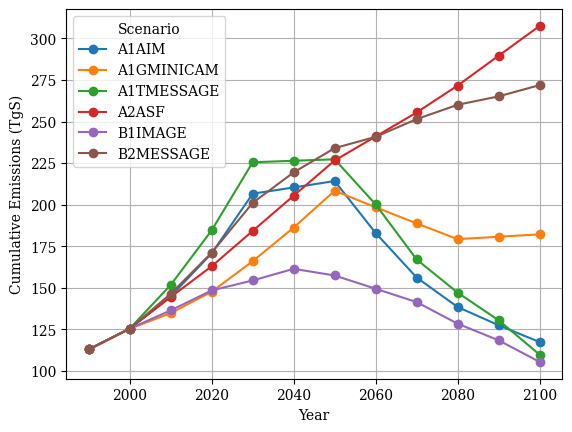

In [8]:
years = 1990+np.arange(12)*10


arr = np.array(df_ch4_raw)
for i, x in enumerate(arr):
    plt.plot(years, x, "-o", label=f"{list(df_ch4['Scenario'])[i]}")
plt.xlabel("Year")
plt.ylabel("Cumulative Emissions (TgS)")
# plt.axis("square")
# plt.title(" CH4 Emissions in Asia")
plt.legend(title="Scenario")
plt.grid()
plt.savefig('../figures/emissions/summary_ch4_asia.eps', format='eps')
plt.show()


In [9]:
# Scenario : A2ASF

In [10]:
df_asf = df[df["Scenario"]=="A2ASF"]
df_asf_nox = df_asf[df_asf["Gas"]=="NOx"]
df_asf_nox.head()

Scenario  Gas  Region     1990     2000     2010     2020     2030  \
52    A2ASF  NOx  OECD90  12.7876  12.1483  13.6149  15.5977  16.9599   
53    A2ASF  NOx     REF   4.6683   2.9234   3.2727   4.0362   4.7346   
54    A2ASF  NOx    ASIA   6.9185   8.9681  12.0514  16.2897  20.4043   
55    A2ASF  NOx     ALM   6.5529   7.9617  10.2326  14.3326  18.5577   

       2040     2050     2060     2070     2080     2090     2100  
52  16.5557  16.1516  16.0540  15.9563  17.0167  19.2351  21.4536  
53   4.9949   5.2552   5.4330   5.6107   6.0773   6.8326   7.5880  
54  23.1429  25.8815  27.8021  29.7226  32.5510  36.2872  40.0234  
55  21.1656  23.7734  26.1650  28.5566  31.8287  35.9814  40.1341

In [11]:
df_asf_nox_raw = df_asf_nox.drop(columns=["Scenario", "Gas", "Region"])
regions = list(df_asf_nox["Region"])
df_asf_nox_raw.head()

1990     2000     2010     2020     2030     2040     2050     2060  \
52  12.7876  12.1483  13.6149  15.5977  16.9599  16.5557  16.1516  16.0540   
53   4.6683   2.9234   3.2727   4.0362   4.7346   4.9949   5.2552   5.4330   
54   6.9185   8.9681  12.0514  16.2897  20.4043  23.1429  25.8815  27.8021   
55   6.5529   7.9617  10.2326  14.3326  18.5577  21.1656  23.7734  26.1650   

       2070     2080     2090     2100  
52  15.9563  17.0167  19.2351  21.4536  
53   5.6107   6.0773   6.8326   7.5880  
54  29.7226  32.5510  36.2872  40.0234  
55  28.5566  31.8287  35.9814  40.1341

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


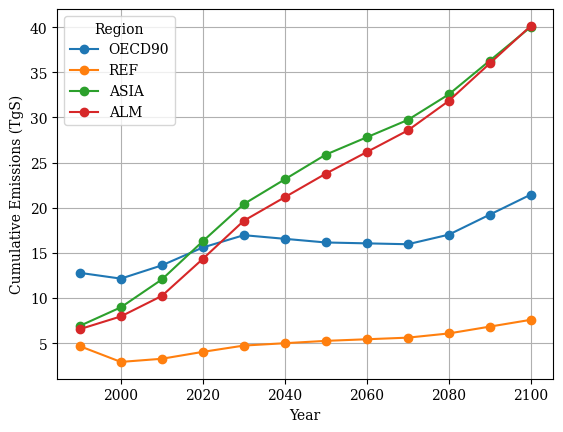

In [12]:
years = 1990+np.arange(12)*10


arr = np.array(df_asf_nox_raw)
for i, x in enumerate(arr):
    plt.plot(years, x, "-o", label=f"{regions[i]}")
plt.xlabel("Year")
plt.ylabel("Cumulative Emissions (TgS)")
# plt.title(" NOx Emissions in Scenario A2ASF")
plt.legend(title="Region")

plt.grid()
# plt.axis("equal")

plt.savefig('../figures/emissions/summary_nox_a2asf.eps', format='eps')

plt.show()